<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/Binary_Classification_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K Nearest Neighbor**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv', delimiter = ',')       # reading train set
df1 = df.drop(columns = ['ID'])
print(df1.shape)

(48000, 21)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df1.iloc[:38400])

print()
print()

print('CROSS VALIDATION SET')
print(df1.iloc[38400:43200])

print()
print()

print('TEST SET')
print(df1.iloc[43200:])

TRAIN SET
       Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
0     -36.963099  -15.014703   87.100435  101.523360   82.106571  -10.956180   
1     -43.715674   18.847116   89.543406  -71.319314   35.597052  126.358570   
2     -30.737550  -63.729643  106.081332   81.773948  112.769976  -12.425351   
3     -27.674757 -118.869495  135.605213   99.130189   50.947548  -63.704785   
4     -28.654141  -77.746597   85.215365   50.374774   79.763207  -32.703048   
...          ...         ...         ...         ...         ...         ...   
38395 -29.171370 -152.034273  156.965320 -239.062422  134.848173    3.380466   
38396 -35.695385  -44.936642  111.833090   51.983170  127.678914  196.218580   
38397 -28.277331 -125.625392  120.194535  -37.492206   99.171636  265.658557   
38398 -23.578333  -91.315717  125.826775   12.103965  141.809009   20.689070   
38399 -25.094541 -102.212333   77.910757 -184.223625   76.150694   10.650616   

       Feature_7  Feature_8  

In [ ]:
df_train = df.iloc[:38400]
df_cv = df.iloc[38400:43200]
df_test = df.iloc[43200:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_20']

x_train = features_train.to_numpy()
y_train = df_train['Class'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ -36.96309934  -15.01470294   87.10043472 ...  173.72298705
   -17.34916949  -82.55084389]
 [ -43.71567402   18.8471157    89.54340644 ...   11.59251925
  -106.12360525  -92.79642051]
 [ -30.73755019  -63.72964268  106.08133168 ...  164.83249783
   -37.41290151  -85.44115039]
 ...
 [ -28.27733131 -125.62539233  120.19453472 ...  226.64061504
   -36.20082092  -84.13798196]
 [ -23.57833262  -91.31571653  125.82677463 ...  129.47777815
   -56.46786852  -81.69364735]
 [ -25.09454148 -102.21233266   77.9107575  ...  268.69517927
   -15.22234372  -88.7867521 ]]

y_train = [0 1 0 ... 1 0 0]


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.9088893   1.58090918 -0.11765156 ...  0.8638893   1.20791272
   0.2591385 ]
 [-2.34980147  2.32556147 -0.0548971  ... -1.40370105 -1.70470321
  -2.01815131]
 [ 0.41956243  0.5096232   0.36992509 ...  0.73954507  0.54963824
  -0.38329148]
 ...
 [ 0.94454135 -0.85152083  0.7324616  ...  1.60400622  0.5894056
  -0.09363553]
 [ 1.94724694 -0.09701974  0.87714121 ...  0.24506663 -0.07553949
   0.44966804]
 [ 1.62370757 -0.33664628 -0.35371374 ...  2.19219008  1.27769211
  -1.12692016]]


## **3. Visualising the Data**

In [ ]:
Class_0 = np.sum(y_train == 0)
Class_1 = np.sum(y_train == 1)

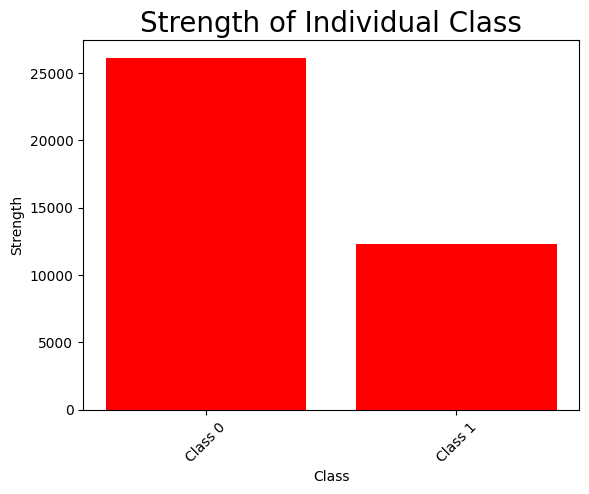

In [ ]:
Category = ['Class 0', 'Class 1']
Value = [Class_0, Class_1]

plt.bar(Category, Value, color = 'red')
plt.title('Strength of Individual Class', fontdict = {'fontsize' : 20})
plt.xlabel('Class')
plt.ylabel('Strength')

plt.xticks(rotation=45)
plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Distance**

In [ ]:
def distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

## **5. KNN**

In [ ]:
def knn(x_train, y_train, x, k=5):

  predictions = []


  for point in x:
    distances = []


    for i in range(len(x_train)):
        dist = distance(x_train[i], point)
        distances.append((dist, i))


    distances = sorted(distances, key=lambda x: x[0])
    neighbors = [y_train[i] for _, i in distances[:k]]


    class_count = {}
    for label in neighbors:
        class_count[label] = class_count.get(label, 0) + 1


    sorted_classes = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
    predictions.append(sorted_classes[0][0])

  return np.array(predictions)

##**6. Cross Validation Set**

In [ ]:
features_cv = df_cv.loc[:, 'Feature_1':'Feature_20']

x_cv = features_cv.to_numpy()
y_cv = df_cv['Class'].to_numpy()

`Same Normalization`

In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[-1.04290014 -0.40543111  1.06029893 ... -0.67202865  0.16225847
  -0.85013976]
 [-1.28764541 -1.55968312  0.85545558 ...  1.50966779  0.83245324
   0.93876578]
 [ 0.11352059  0.37085937 -0.6519622  ... -0.26368129 -0.38642738
   1.24479545]
 ...
 [ 1.37180738 -1.36734902  0.22169072 ...  0.18901961 -0.22496946
  -0.38910997]
 [-0.52802193  2.17126539 -0.13363288 ... -0.98156353 -1.33878198
  -1.39026553]
 [ 0.21638046 -0.46807723 -0.5261406  ... -2.0524872  -0.34015016
  -1.00635515]]
y_cv = [0 0 0 ... 0 1 0]


`Testing on CV Set`

In [ ]:
m_cv = x_cv.shape[0]

In [ ]:
pred_cv = knn(x_train, y_train, x_cv, k=5)

print(f"Predicted Class = {pred_cv}")

Predicted Class = [0 0 0 ... 0 1 0]


`Accuracy`

In [ ]:
count_cv = 0
for i in range(m_cv):

  if pred_cv[i] == y_cv[i]:
    count_cv += 1
  else:
    count_cv += 0

accuracy_cv = count_cv / m_cv

print(f"Accuracy for Cross Validation Set = {accuracy_cv * 100}%")

Accuracy for Cross Validation Set = 93.75%


##**7. Test Set**

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_20']

x_test = features_test.to_numpy()
y_test = df_test['Class'].to_numpy()

`Testing on Test Set`

In [ ]:
m_test = x_test.shape[0]

In [ ]:
pred_test = knn(x_train, y_train, x_test, k=5)

print(f"Predicted Class = {pred_test}")

Predicted Class = [1 1 1 ... 0 1 1]


`Accuracy`

In [ ]:
count_test = 0

for i in range(m_test):

  if pred_test[i] == y_test[i]:
    count_test += 1
  else:
    count_test += 0

accuracy_test = count_test / m_test

print(f'Accuracy of Test Set = {accuracy_test * 100}%')

Accuracy of Test Set = 60.54166666666667%


##**8. F1 Score for CV Set**

In [ ]:
def precision_recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))

    FP = np.sum((y_true == 0) & (y_pred == 1))

    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0

    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0

    return precision, recall

`Precision - Recall for CV Set`

In [ ]:
precision, recall = precision_recall(y_cv, pred_cv)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9385
Recall: 0.8558


`F1 Score`

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)

print(f"F1 Score = {F1}")

F1 Score = 0.8952513966480448


##**9. Predictions for Offcial Test Set**

`Set`

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/binary_classification_test.csv', delimiter = ',')       # reading train set
df2 = df_test.drop(columns = ['ID'])
print(df2.shape)

(12000, 20)


In [ ]:
features_test = df2.loc[:, 'Feature_1':'Feature_20']
x_test = features_test.to_numpy()


print(f"x_test = {x_test}")

x_test = [[ -21.26363576 -101.51076439   70.11556349 ...  136.88072759
   -53.74652746  -88.62431164]
 [ -28.64648942 -104.09002777  124.09897384 ...  155.04005059
   -43.39047591  -85.58479057]
 [ -34.08442676 -149.47146391  131.88319263 ...  201.92991029
   -40.22577214  -86.23567733]
 ...
 [ -24.54799465 -152.07259248  132.76791814 ...  148.10618381
   -80.19449353  -89.79112231]
 [ -29.20006765 -100.30330433  115.70992256 ...  180.81790728
   -36.34370299  -85.99400505]
 [ -25.23942763 -188.99675094   87.77596258 ...  175.62274141
   -19.16044345  -81.53031155]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f'Normalized x_test = {x_test}')

Normalized x_test = [[ 2.44117334 -0.32121815 -0.55395478 ...  0.34860582  0.01374546
  -1.09081443]
 [ 0.86576778 -0.37793851  0.83275788 ...  0.60258587  0.35351896
  -0.41521845]
 [-0.29461777 -1.3759177   1.03271699 ...  1.25839718  0.45735028
  -0.5598914 ]
 ...
 [ 1.7403336  -1.4331189   1.0554436  ...  0.50560738 -0.85399047
  -1.35016207]
 [ 0.74764134 -0.294665    0.61726198 ...  0.96312032  0.58471776
  -0.50617478]
 [ 1.59279074 -2.24511484 -0.10029876 ...  0.89045966  1.14848631
   0.48597277]]


`Predictions`

In [ ]:
m_test = x_test.shape[0]

In [ ]:
predictions = knn(x_train, y_train, x_test, k=5)

print(f"Predicted Class = {predictions}")

Predicted Class = [0 0 0 ... 0 1 0]


`Saving Predictions`

In [ ]:
# df = pd.DataFrame(predictions)
# df.columns = ['Prediction_binaryclassification']
# df.to_csv('/content/drive/MyDrive/binaryclassification_test_prediction.csv', index=False)